# Ayush Porwal

# Data Science and Business Analytics intern at THE SPARKS FOUNDATION

# GRIP APRIL 2021

## TASK-1 : Prediction using supervised ML

In [3]:
#importing the suitable libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import model_selection


In [4]:
# importing data set csv file using pandas and checking our dataframe

df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# we determine the number of cluster required to separate our dataset by determining number of classes in our labels

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# we are dropping Species column as we want to predict the classes and also dropping ID column because it doenot give us 
# any valuable information

X = df.drop(['Species','Id'],axis = 1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Finding the null values in our dataframe

X.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

As we have already find number of cluster required by evaluating the number of classes in label column but to calculate optimal number of cluster we want a systematic approach that's why we are using the Elbow method which gives us optimal number of clusters

In [8]:
# ELBOW METHOD

wcss = []

for i in range(1,11):
    kMean = KMeans(n_clusters = i,init = "k-means++",random_state = 0,max_iter = 300)
    kMean.fit(X)
    wcss.append(kMean.inertia_)

Text(0, 0.5, 'Inertia')

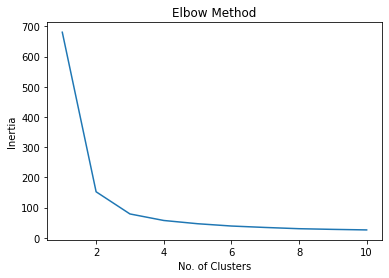

In [9]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

fig1 = plt.figure(1)
ax1 = plt.subplot2grid((1,1),(0,0))

ax1.plot(range(1,11),wcss)
ax1.set_title("Elbow Method")
ax1.set_xlabel("No. of Clusters")
ax1.set_ylabel("Inertia")

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier

clf = KMeans(n_clusters = 3,init = "k-means++",random_state = 0,max_iter = 300)
pred_y = clf.fit_predict(X)

In [11]:
# Defining the centroids

c1 = X[pred_y==0]
c2 = X[pred_y==1]
c3 = X[pred_y==2]

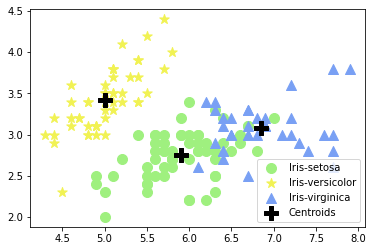

In [12]:
# Visualising the clusters - On the first two columns

fig2 = plt.figure(2)
ax2 = plt.subplot2grid((1,1),(0,0))

ax2.scatter(c1.iloc[:,0],c1.iloc[:,1],color = '#9ff07f',label = "Iris-setosa",s = 100,marker='o')
ax2.scatter(c2.iloc[:,0],c2.iloc[:,1],color = '#f1f253',label="Iris-versicolor",s=100,marker='*')
ax2.scatter(c3.iloc[:,0],c3.iloc[:,1],color = '#79a0f4',label="Iris-virginica",s=100,marker='^')

# Visualising the centroids - on the first two columns

ax2.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],c = "k",marker = "P",s = 200,label = "Centroids")
ax2.legend()


Above plot represent three cluster and their centroids point

And this conclude our K-Mean classifier 

# THANK YOU!